In [1]:
import pandas as pd
import sqlite3

In [5]:
gdp_data = pd.read_csv('gdp_data.csv')
gdp_data

,Characteristic,GDP in billion U.S. dollars
0,2027*,"5,365.55"
1,2026*,"4,947.39"
2,2025*,"4,547.16"
3,2024*,"4,170.22"
4,2023*,"3,820.57"
5,2022,"3,468.57"
6,2021,"3,176.30"
7,2020,"2,667.69"
8,2019,"2,831.55"
9,2018,"2,702.93"


In [6]:
conn = sqlite3.connect('gdp.db')

In [8]:
gdp_data.to_sql('year',conn)

41

In [9]:
%load_ext sql

In [11]:
%sql sqlite:///gdp.db

In [12]:
%%sql
SELECT * FROM year

 * sqlite:///gdp.db
Done.


index,Characteristic,GDP in billion U.S. dollars
0,2027*,"5,365.55"
1,2026*,"4,947.39"
2,2025*,"4,547.16"
3,2024*,"4,170.22"
4,2023*,"3,820.57"
5,2022,"3,468.57"
6,2021,"3,176.30"
7,2020,"2,667.69"
8,2019,"2,831.55"
9,2018,"2,702.93"


In [17]:
%%sql
SELECT COUNT(*) FROM gdp

 * sqlite:///gdp.db
Done.


COUNT(*)
41


In [18]:
gdp_data = pd.read_sql_query('SELECT * FROM gdp',conn)

In [20]:
import requests

In [21]:
response = requests.get('https://api.exchangerate-api.com/v4/latest/USD')
data = response.json()
usd_to_inr = data['rates']['INR']

In [22]:
import matplotlib.pyplot as plt

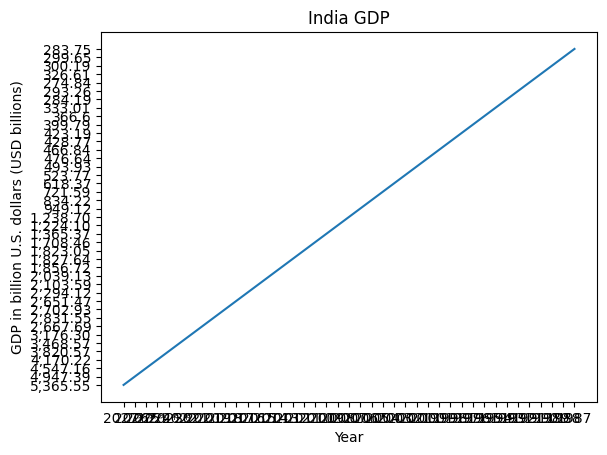

In [27]:
plt.plot(gdp_data['Characteristic'], gdp_data['GDP in billion U.S. dollars'])
plt.xlabel('Year')
plt.ylabel('GDP in billion U.S. dollars (USD billions)')
plt.title('India GDP')
plt.show()

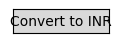

In [38]:
def convert_to_inr():
    gdp_data['GDP in billion U.S. dollars'] = gdp_data['GDP in billion U.S. dollars'] * usd_to_inr / 1e9
    plt.plot(df['Characteristic'], gdp_data['GDP in billion U.S. dollars'])
    plt.xlabel('Characteristic')
    plt.ylabel('GDP in billion U.S. dollars (INR billions)')
    plt.title('India GDP (INR)')
    
button = plt.Button(plt.axes([0.8, 0.95, 0.15, 0.05]), 'Convert to INR')
button.on_clicked(convert_to_inr)
plt.show()

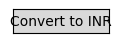

In [37]:
def convert_to_inr(event):
    plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    plt.gca().set_ylim([0, df['gdp_usd'].max()*conversion_factor])
    plt.ylabel('GDP (in INR billions)')

button = plt.Button(plt.axes([0.8, 0.95, 0.15, 0.05]), 'Convert to INR')
button.on_clicked(convert_to_inr)

plt.show()